In [1]:
import tensorflow as tf
tf.__version__


'2.15.0'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Database import

In [7]:
temperature_df = pd.read_csv('Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop=True, inplace=True)
temperature_df.head()
#temperature_df.tail()
#temperature_df.info()
#temperature_df.describe()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


# Database visualization

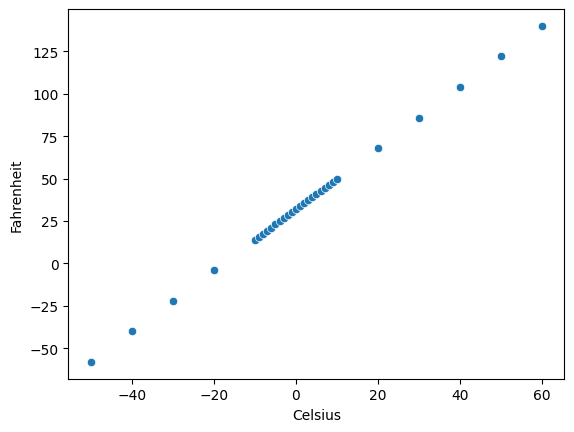

In [13]:
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit']);

# Configuration of training DB

In [14]:
x_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

In [17]:
x_train.shape

(30,)

In [18]:
y_train.shape

(30,)

#Modeling and fitting

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [22]:
epochs_hist = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 18ms/step - loss: 1.3206
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 1.1689
Epoch 3/500
1/1 [==============================] - 0s 13ms/step - loss: 1.0360
Epoch 4/500
1/1 [==============================] - 0s 14ms/step - loss: 0.9153
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 0.8032
Epoch 6/500
1/1 [==============================] - 0s 17ms/step - loss: 0.7007
Epoch 7/500
1/1 [==============================] - 0s 25ms/step - loss: 0.6104
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 0.5331
Epoch 9/500
1/1 [==============================] - 0s 30ms/step - loss: 0.4661
Epoch 10/500
1/1 [==============================] - 0s 18ms/step - loss: 0.4057
Epoch 11/500
1/1 [==============================] - 0s 22ms/step - loss: 0.3499
Epoch 12/500
1/1 [==============================] - 0s 23ms/step - loss: 0.2997
Epoch 13/500
1/1 [==============================]

#Model Assessment

In [23]:
epochs_hist.history.keys()

dict_keys(['loss'])

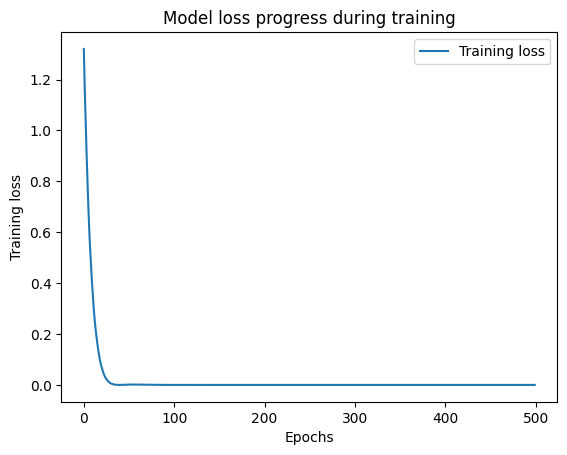

In [27]:
plt.plot(epochs_hist.history['loss']);
plt.title('Model loss progress during training');
plt.xlabel('Epochs');
plt.ylabel('Training loss');
plt.legend(['Training loss']);

In [28]:
model.get_weights()

[array([[1.7999998]], dtype=float32), array([32.000015], dtype=float32)]

#Test

In [32]:
temp_c = 10
temp_f = model.predict([temp_c])
print(temp_f)

1/1 [==============================] - 0s 51ms/step
[[50.000015]]


In [33]:
temp_f1 = 9/5 * temp_c + 32
print(temp_f1)

50.0
